In [1]:
import pandas as pd
original_data=pd.read_csv('data/solarpower.csv')
data=original_data.copy()

In [2]:
for i in data.index:
    if data.loc[i,'cum_power']==-1:
        past=float(data.loc[i-1,'cum_power'])
        next=float(data.loc[i+1,'cum_power'])
        need_mean=(past+next)/2
        data.loc[i,'cum_power']=need_mean

Чему равно среднее арифметическое в столбце cum_power после заполнения пропусков? Ответ округлите до целого.

In [3]:
round(data['cum_power'].mean())

23848

In [4]:
data['date']=pd.to_datetime(data['date'])
begin=data.loc[0,'cum_power']
data['day_power']=data['cum_power'].diff()

Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год

In [5]:
data['Год']=data['date'].dt.year
data['Месяц']=data['date'].dt.month
grouped_data=data.groupby(['Год','Месяц'])['day_power'].mean()

Затем сгруппируйте данные по периодам (год-месяц) и рассчитайте среднее в столбце day_power.

Сколько солнечной энергии в среднем в день выработали в марте 2017 года? Ответ округлите до целого.

In [6]:
round(grouped_data.loc[2017,3])

11

Постройте график временного ряда — средней ежедневной выработки солнечной энергии на каждый месяц-год. Не забудьте подписать оси и сам график.

Выберите вывод, который можно сделать из полученного графика:

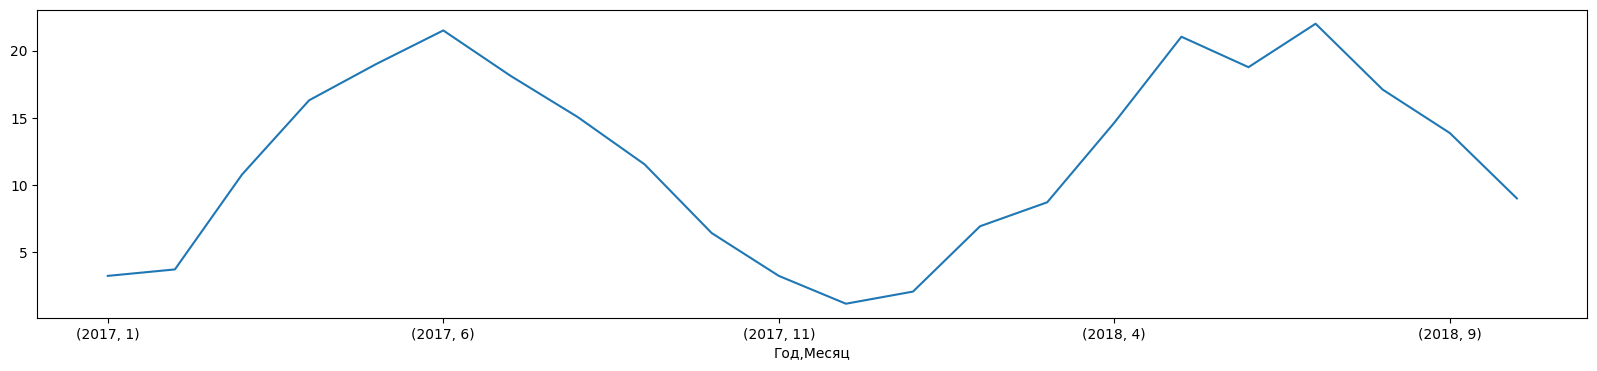

In [7]:
grouped_data.plot(
    kind='line',
    figsize=(20,4)
);

In [8]:
grouped_data

Год   Месяц
2017  1         3.233333
      2         3.714286
      3        10.774194
      4        16.300000
      5        19.000000
      6        21.500000
      7        18.129032
      8        15.064516
      9        11.533333
      10        6.419355
      11        3.233333
      12        1.161290
2018  1         2.064516
      2         6.928571
      3         8.709677
      4        14.633333
      5        21.032258
      6        18.766667
      7        22.000000
      8        17.096774
      9        13.866667
      10        9.000000
Name: day_power, dtype: float64